# [Detekcja pojazdów](https://www.kaggle.com/datasets/ashfakyeafi/road-vehicle-images-dataset)
Użyteczne linki:  
[Exploring your image datasets the right way](https://raychunyin00.medium.com/computer-vision-exploring-your-image-datasets-the-right-way-538c5ae8ca5d)


# Opis problemu i danych
Problem - detekcja i klasyfikacja pojazdów na obrazie  
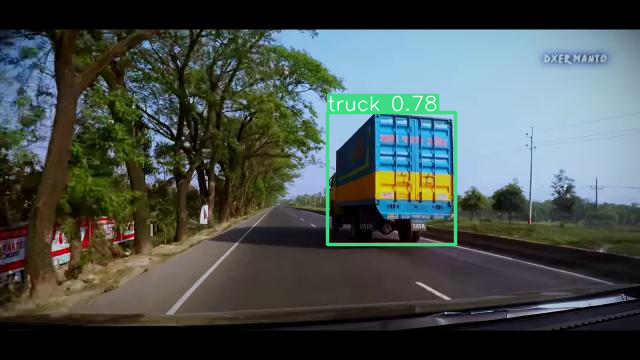

Problem identyfikacji i klasyfikacji obiektu zostaje sprowadzony do problemu klasy regresji poprzez użycie technik YOLO. Połączenia Algorytm YOLO próbuje przeformułować wykrywanie obiektów w pojedynczy problem regresji, łącznie z pikselami obrazu, na prawdopodobieństwa klas i współrzędne ramki ograniczającej. Dlatego algorytm musi spojrzeć na obraz tylko raz, aby przewidzieć i zlokalizować obiekty docelowe na obrazach. 

In [2]:
import os
import random

import cv2

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import shapiro, kstest
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
plt.style.use('seaborn-v0_8-darkgrid')

In [3]:
#train_images = "archive/trafic_data/train/images"
#train_labels = "archive/trafic_data/train/labels"

train_images = r"D:\vehicle_detection\trafic_data\train\images"
train_labels = r"D:\vehicle_detection\trafic_data\train\labels"

valid_images = r"D:\vehicle_detection\trafic_data\valid\images"
valid_labels = r"D:\vehicle_detection\trafic_data\valid\labels"



## Wizualizacja danych treningowych - *zdjęć z labelami*

['4 0.5662983425414365 0.44375 0.3342541436464088 0.240625']
['4 0.6546875 0.5083333333333333 0.5984375 0.5388888888888889', '4 0.1578125 0.4527777777777778 0.215625 0.29444444444444445']
['5 0.8609375 0.6694444444444444 0.2703125 0.37777777777777777', '5 0.7171875 0.6666666666666666 0.1484375 0.22777777777777777', '5 0.634375 0.6555555555555556 0.0703125 0.13333333333333333', '5 0.5078125 0.7138888888888889 0.2171875 0.325', '10 0.115625 0.7361111111111112 0.1765625 0.5166666666666667', '17 0.034375 0.7472222222222222 0.06875 0.25833333333333336', '5 0.2609375 0.7388888888888889 0.178125 0.25833333333333336']
['15 0.353125 0.5888888888888889 0.221875 0.39444444444444443', '5 0.6765625 0.5944444444444444 0.315625 0.33055555555555555', '19 0.4828125 0.45 0.13125 0.2', '9 0.765625 0.48333333333333334 0.21875 0.25277777777777777', '4 0.909375 0.44722222222222224 0.1765625 0.36666666666666664', '15 0.553125 0.4 0.0421875 0.09166666666666666', '4 0.3953125 0.3472222222222222 0.10625 0.17777

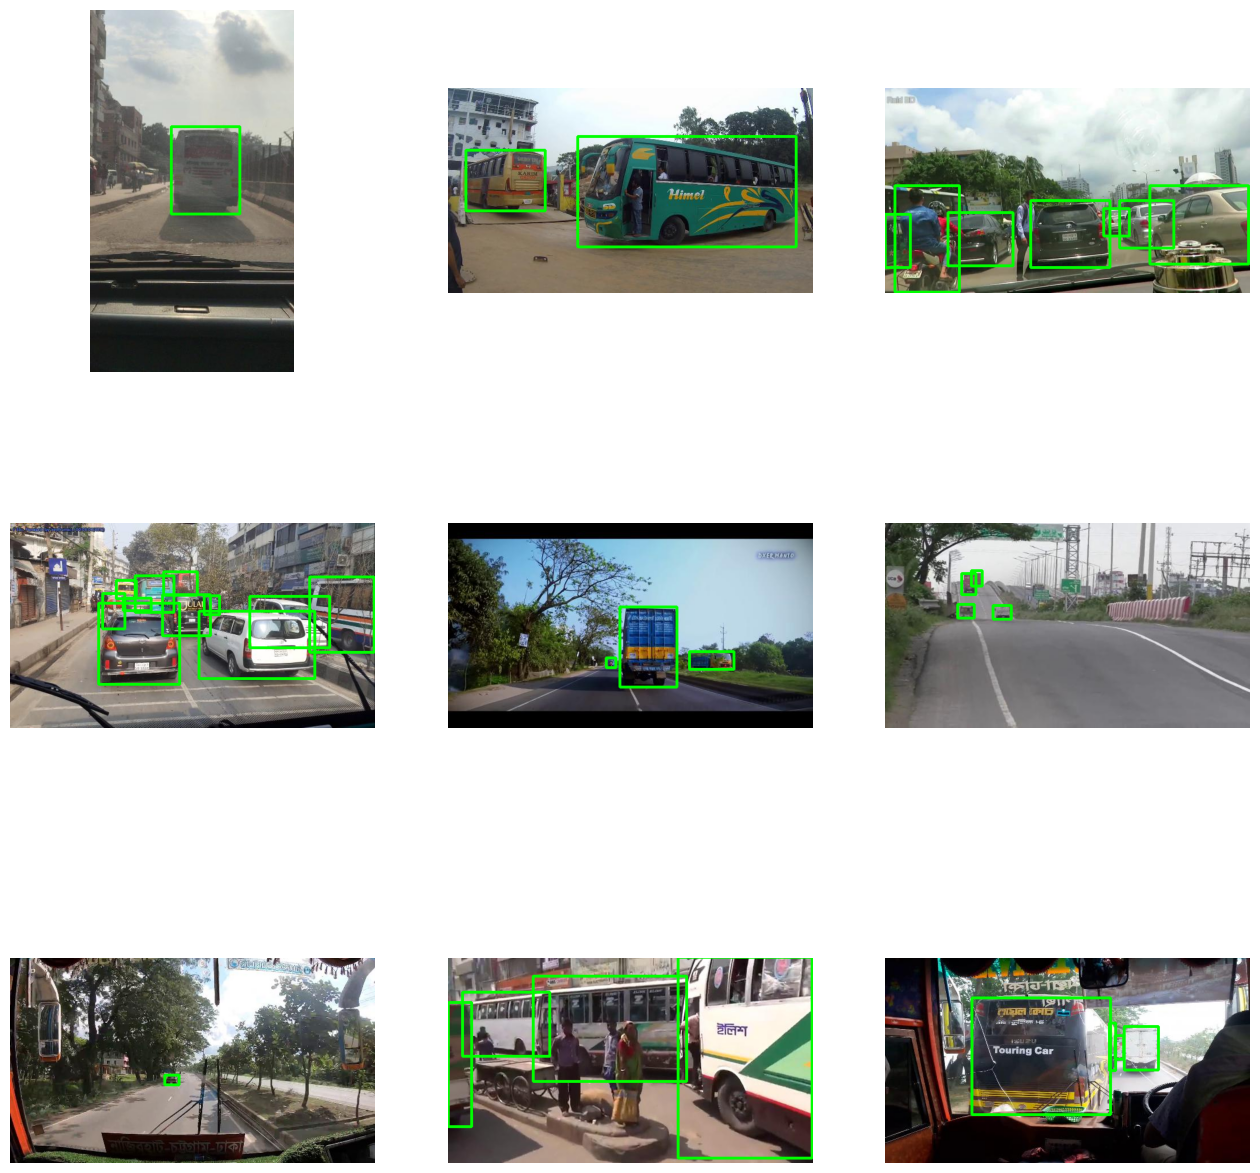

In [4]:
def load_labels(image_file, train_labels):
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")
    
    return labels



def plot_object_detections(ax, image, labels):
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')



image_files = os.listdir(train_images)
image_files_valid = os.listdir(valid_images)

random_images = random.sample(image_files, 9)

#print(image_files)


fig, axs = plt.subplots(3, 3, figsize=(16, 16))


for i, image_file in enumerate(random_images):
    row, col = divmod(i, 3)
    
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    labels = load_labels(image_file, train_labels)
    print(labels)
    plot_object_detections(axs[row, col], image, labels)

plt.show()

In [5]:
with open(r"D:\vehicle_detection\trafic_data\data_1.yaml", 'r') as f:

    #with open('archive/trafic_data/data_1.yaml', 'r') as f:
    
    data = f.read()
    
print(data)

train: ../train/images
val: ../valid/images

nc: 21
names: ['ambulance', 'army vehicle', 'auto rickshaw', 'bicycle', 'bus', 'car', 'garbagevan', 'human hauler', 'minibus', 'minivan', 'motorbike', 'pickup', 'policecar', 'rickshaw', 'scooter', 'suv', 'taxi', 'three wheelers -CNG-', 'truck', 'van', 'wheelbarrow']


In [6]:
h, w, c = image.shape 
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 640x360 and 3 channels.


In [7]:
print(f"Długość zbioru train: {len(image_files)}")
print(f"Długość zbioru valid: {len(image_files_valid)}")


Długość zbioru train: 2704
Długość zbioru valid: 300


In [36]:
shapes_df_train = pd.DataFrame()
heights = []
widths = []
channels = []
for i, image_file in enumerate(image_files):
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)
    
    shape = image.shape
    heights.append(shape[0])
    widths.append(shape[1])
    channels.append(shape[2])

shapes_df_train['width'] = widths
shapes_df_train['height'] = heights
shapes_df_train['channel'] = channels

shapes_df_valid =  pd.DataFrame()
heights = []
widths = []
channels = []
for i, image_file in enumerate(image_files_valid):
    image_path = os.path.join(valid_images, image_file)
    image = cv2.imread(image_path)
    
    shape = image.shape
    heights.append(shape[0])
    widths.append(shape[1])
    channels.append(shape[2])

shapes_df_valid['width'] = widths
shapes_df_valid['height'] = heights
shapes_df_valid['channel'] = channels
    
    

In [37]:
print(f"""Unique (Width, Height, Channel) values for train data: {
    len(shapes_df_train['width'].unique()),
    len(shapes_df_train['height'].unique()),
    len(shapes_df_train['channel'].unique())
    }""")

print(f"""Unique (Width, Height, Channel) values for valid data: {
    len(shapes_df_valid['width'].unique()),
    len(shapes_df_valid['height'].unique()),
    len(shapes_df_valid['channel'].unique())
    }""")

Unique (Width, Height, Channel) values for train data: (73, 200, 1)
Unique (Width, Height, Channel) values for valid data: (2, 4, 1)


In [41]:
print(f"""Unikalne kombinacje train: {
    len(shapes_df_train[['width', 'height', 'channel']].drop_duplicates())
    }""")

print(f"""Unikalne kombinacje valid: {
    len(shapes_df_valid[['width', 'height', 'channel']].drop_duplicates())
    }""")

Unikalne kombinacje train: 270
Unikalne kombinacje valid: 4


In [44]:
print('train images')
print(shapes_df_train.value_counts()[:5])


print('valid images')
print(shapes_df_valid.value_counts()[:5])

train images
width  height  channel
640    360     3          1510
360    640     3           274
480    640     3           138
640    359     3           132
       362     3            85
Name: count, dtype: int64
valid images
width  height  channel
640    360     3          162
       359     3          136
1125   614     3            1
       621     3            1
Name: count, dtype: int64


Widać, że najpopularniejsza kombinacja to 640x360 i vice versa.

In [45]:
# treating WxH as HxW
most_popular_shape = shapes_df_train.value_counts()[:2]
print(f"% zbioru jaki ma najpopularniejsza ({most_popular_shape[:1].index.names}) rozdzielczość: {most_popular_shape.sum()/len(shapes_df_train)*100:.2f} %")

most_popular_shape = shapes_df_valid.value_counts()[:2]
print(f"% zbioru jaki ma najpopularniejsza ({most_popular_shape[:1].index.names}) rozdzielczość: {most_popular_shape.sum()/len(shapes_df_valid)*100:.2f} %")

% zbioru jaki ma najpopularniejsza (['width', 'height', 'channel']) rozdzielczość: 65.98 %
% zbioru jaki ma najpopularniejsza (['width', 'height', 'channel']) rozdzielczość: 99.33 %


In [46]:
del shapes_df_train
del shapes_df_valid

In [61]:
def files_to_df(files,images):

    mean_r_values = []
    mean_g_values = []
    mean_b_values = []
    mean_values = []
    for i, image_file in enumerate(files):
        image_path = os.path.join(images, image_file)
        image = cv2.imread(image_path)

        mean_r_value = np.mean(image[:, :, 0])
        mean_r_values.append(mean_r_value)

        mean_g_value = np.mean(image[:, :, 1])
        mean_g_values.append(mean_g_value)

        mean_b_value = np.mean(image[:, :, 2])
        mean_b_values.append(mean_b_value)

        mean_value = np.mean(image)
        mean_values.append(mean_value)
        
    df = pd.DataFrame()
    df['r_mean'] = mean_r_values
    df['g_mean'] = mean_g_values
    df['b_mean'] = mean_b_values

    return df

In [58]:
def normalization_tests(color_df):

    stat, p = shapiro(color_df)
    print(f"Shapiro-Wilk score: {stat}, p-value: {p}")

    stat, p = kstest(color_df["r_mean"],"norm")
    print(f"Kolmogorow-Smirnow score for r_mean: {stat}, p-value: {p}")


    stat, p = kstest(color_df["g_mean"],"norm")
    print(f"Kolmogorow-Smirnow score for g_mean: {stat}, p-value: {p}")


    stat, p = kstest(color_df["b_mean"],"norm")
    print(f"Kolmogorow-Smirnow score for b_mean: {stat}, p-value: {p}")

In [59]:
def plot_colors(files,images):

    color_df = files_to_df(files,images)

    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    plt.rcParams['lines.linewidth'] = 0.5

    sns.kdeplot(color_df['r_mean'], color='r', fill=True, label=f'Red Mean = {np.mean(color_df.r_mean):.1f}')
    sns.kdeplot(color_df['g_mean'], color='g', fill=True, label=f'Green Mean = {np.mean(color_df.g_mean):.1f}')
    sns.kdeplot(color_df['b_mean'], color='b', fill=True, label=f'Blue Mean = {np.mean(color_df.b_mean):.1f}')

    plt.xlabel('Value')
    plt.ylabel('Density')

    plt.legend()
    plt.show()


    color_df.describe()

    normalization_tests(color_df)

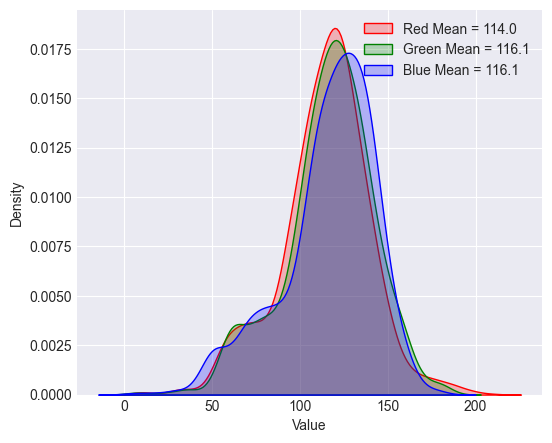

C:\Users\adank\AppData\Local\Temp\ipykernel_27708\1498151782.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8112.
  stat, p = shapiro(color_df)


Shapiro-Wilk score: 0.9743929787723786, p-value: 1.0075286838187742e-35
Kolmogorow-Smirnow score for r_mean: 0.9999999999984994, p-value: 0.0
Kolmogorow-Smirnow score for g_mean: 0.9996301699976553, p-value: 0.0
Kolmogorow-Smirnow score for b_mean: 0.9996293972858735, p-value: 0.0


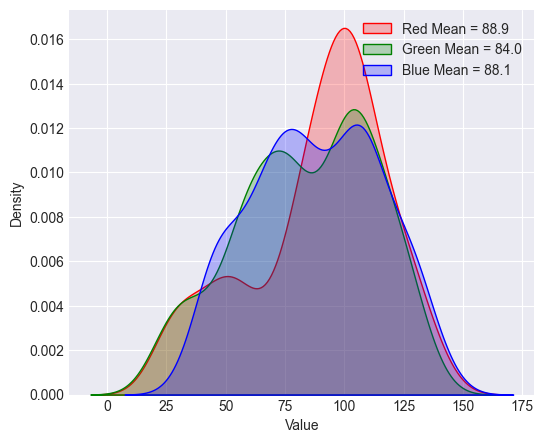

Shapiro-Wilk score: 0.9746267260271092, p-value: 2.0518171613754277e-11
Kolmogorow-Smirnow score for r_mean: 1.0, p-value: 0.0
Kolmogorow-Smirnow score for g_mean: 1.0, p-value: 0.0
Kolmogorow-Smirnow score for b_mean: 1.0, p-value: 0.0


In [62]:
plot_colors(image_files,train_images)
plot_colors(image_files_valid,valid_images)

Jak widać na powyższym wykresie i statystykach, rozkład kolorów jest podobny oraz w miarę zrównoważony. Widać także, że średnia kolorów jest raczej poniżej spodziewanej średniej standardowego rozkładu kolorów (średnia 128). Natomiast test Shapiro-Wilka na normalizację wskazuje wysoki wynik z niezwykle niskim p-value, co oznacza, że wynik ma bardzo niskie prawdopodobieństwo bycia przypadkiem. Zatem można obyć się bez normalizacji.

Ostrzeżenie, które pojawia się podczas uruchamiania testu Shapiro-Wilka wskazuje na to, że mogą pojawiać się pewne niedokładności z powodu przeznaczenia tego testu głównie dla małych prób. Progiem istotności jest p=0.05, nasz wynik jest nieporównywalnie mniejszy, natomiast wykonaliśmy jeszcze test Kolmogorowa-Smirnowa, który powinien zwracać dokładniejszy wynik dla tak dużych prób, jak ta. Wyniki są jeszcze badziej zbliżone do idealnych, stąd odrzucamy istotność testu, czyli hipotezę zerową dla rozkładu normalnego. 

Histogram dla zmiennej wyjściowej:


In [68]:

with open(r"D:\vehicle_detection\trafic_data\data_1.yaml", 'r') as f:

    #with open('archive/trafic_data/data_1.yaml', 'r') as f:
    
    data = f.readlines()


vehicles_str = data[4].split(": ")[1].replace("[","").replace("]","")
vehicles_str = list(vehicles_str.split(", "))

classes_of_vehicles = []

for vehicle in vehicles_str:

    vehicle = vehicle.replace("'","")
    classes_of_vehicles.append(vehicle)


In [69]:
vehicles_counter = [0] * len(classes_of_vehicles)

In [70]:
print(len(classes_of_vehicles))

21


[70, 43, 372, 427, 2909, 4632, 3, 169, 93, 822, 1949, 1083, 31, 3336, 37, 798, 41, 2734, 1411, 693, 111]
['ambulance', 'army vehicle', 'auto rickshaw', 'bicycle', 'bus', 'car', 'garbagevan', 'human hauler', 'minibus', 'minivan', 'motorbike', 'pickup', 'policecar', 'rickshaw', 'scooter', 'suv', 'taxi', 'three wheelers -CNG-', 'truck', 'van', 'wheelbarrow']


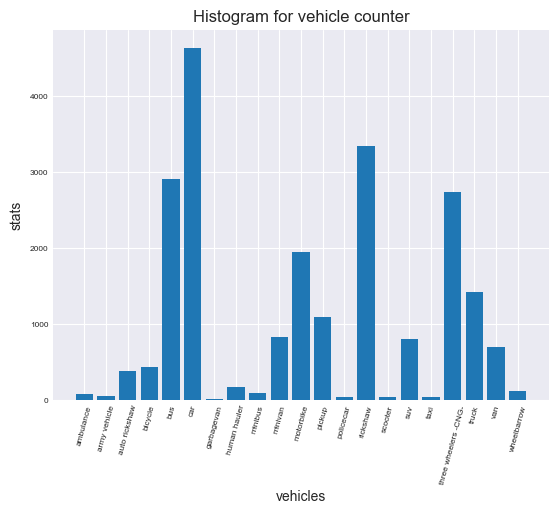

<Figure size 1000x800 with 0 Axes>

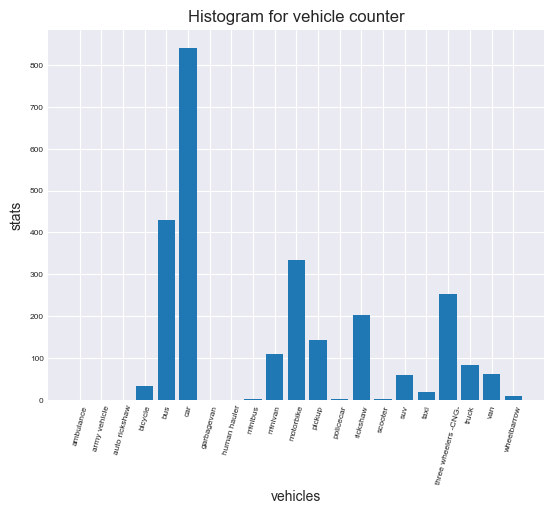

<Figure size 1000x800 with 0 Axes>

In [71]:
    

for i, image_file in enumerate(image_files):


    labels = load_labels(image_file, train_labels)
    
    for label in labels:
        if label.split(" ")[0] != '':
            
            vehicle_nr = int(label.split(" ")[0])

            if vehicle_nr >= 0 and vehicle_nr < len(classes_of_vehicles):
                vehicles_counter[vehicle_nr] += 1


print(vehicles_counter)
print(classes_of_vehicles)


plt.bar(classes_of_vehicles, vehicles_counter)
plt.title('Histogram for vehicle counter', fontsize=12)
plt.xlabel('vehicles', fontsize=10)
plt.ylabel('stats', fontsize=10)
plt.xticks(fontsize=6,rotation=75)
plt.yticks(fontsize=6)
plt.figure(figsize=(10, 8))
plt.show()


vehicles_counter = [0] * len(classes_of_vehicles)


for i, image_file in enumerate(image_files_valid):


    labels = load_labels(image_file, valid_labels)
    
    for label in labels:
        if label.split(" ")[0] != '':
            
            vehicle_nr = int(label.split(" ")[0])

            if vehicle_nr >= 0 and vehicle_nr < len(classes_of_vehicles):
                vehicles_counter[vehicle_nr] += 1



plt.bar(classes_of_vehicles, vehicles_counter)
plt.title('Histogram for vehicle counter', fontsize=12)
plt.xlabel('vehicles', fontsize=10)
plt.ylabel('stats', fontsize=10)
plt.xticks(fontsize=6,rotation=75)
plt.yticks(fontsize=6)
plt.figure(figsize=(10, 8))
plt.show()

## Podsumowanie sekcji
- 21 klas
- zbiór posiada 2704 obrazy
- istnieje wiele unikalnych wartości wysokości i szerokości obrazów, natomiast wartość kanałów jest jedna: 3 (RGB).
- unikalnych kombinacji tych trzech parametrów jest 270.  
- najpopularniejsza z nich (640x360 i odwrotnie) to około 66% całego zbioru. podczas transformacji warto będzie się przyglądnąć temu rozkładowi.

Oznacza to, że model albo musi być uniwersalny w przyjmowaniu rozmiarów wejściowych, albo obrazy należy zmodyfikować (a tym samym zmienić proporcje z np. 16:9 -> 1:1 {ustalona wielkość})  
Jedyne dane jakie posiadamy w tej chwili to dane zdjęcia, czyli zmienne traktowane ilościowo.  
  
Przeglądając te zdjęcia można zauważyć, że są one prawdopodobnie wyłącznie w jednym kraju, zapewne Azjatyckim. (Mój typ: Indie lub Tajlandia).

Rozkład kolorów na zdjęciu jest zrównoważony i bardzo zbliżony do rozkładu normalnego, jak to ukazazał nam test Shapiro-Wilka (0.97 z p-value 10^(-35)) oraz Kołmogorowa-Smirnowa, zatem nie jest konieczna normalizacja.